In [ ]:
#해당 강의 번호: 9번~13번
#강의자분은 콜랩대신 쥬피터 노트북 사용

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import *
from keras.models import *
from keras.utils import *
from collections import Counter

In [14]:
#뉴런넷을 사용할 때, 아래와 같이 사용한다.

x = np.linspace(1,10,1000)
#np.linspace : 넘파이 라이브러리의 linspace(등분)를 사용한다.
#(1,10,1000) : 1부터 10까지를 1000등분 실시한다.

print(x)

[ 1.          1.00900901  1.01801802  1.02702703  1.03603604  1.04504505
  1.05405405  1.06306306  1.07207207  1.08108108  1.09009009  1.0990991
  1.10810811  1.11711712  1.12612613  1.13513514  1.14414414  1.15315315
  1.16216216  1.17117117  1.18018018  1.18918919  1.1981982   1.20720721
  1.21621622  1.22522523  1.23423423  1.24324324  1.25225225  1.26126126
  1.27027027  1.27927928  1.28828829  1.2972973   1.30630631  1.31531532
  1.32432432  1.33333333  1.34234234  1.35135135  1.36036036  1.36936937
  1.37837838  1.38738739  1.3963964   1.40540541  1.41441441  1.42342342
  1.43243243  1.44144144  1.45045045  1.45945946  1.46846847  1.47747748
  1.48648649  1.4954955   1.5045045   1.51351351  1.52252252  1.53153153
  1.54054054  1.54954955  1.55855856  1.56756757  1.57657658  1.58558559
  1.59459459  1.6036036   1.61261261  1.62162162  1.63063063  1.63963964
  1.64864865  1.65765766  1.66666667  1.67567568  1.68468468  1.69369369
  1.7027027   1.71171171  1.72072072  1.72972973  1.

In [15]:
#y값은 리니어한 값으로 한다고 
y=2*x+1
print(y) #3~21까지 출력하게 된다. 갯수는 마찬가지로 1000개

[ 3.          3.01801802  3.03603604  3.05405405  3.07207207  3.09009009
  3.10810811  3.12612613  3.14414414  3.16216216  3.18018018  3.1981982
  3.21621622  3.23423423  3.25225225  3.27027027  3.28828829  3.30630631
  3.32432432  3.34234234  3.36036036  3.37837838  3.3963964   3.41441441
  3.43243243  3.45045045  3.46846847  3.48648649  3.5045045   3.52252252
  3.54054054  3.55855856  3.57657658  3.59459459  3.61261261  3.63063063
  3.64864865  3.66666667  3.68468468  3.7027027   3.72072072  3.73873874
  3.75675676  3.77477477  3.79279279  3.81081081  3.82882883  3.84684685
  3.86486486  3.88288288  3.9009009   3.91891892  3.93693694  3.95495495
  3.97297297  3.99099099  4.00900901  4.02702703  4.04504505  4.06306306
  4.08108108  4.0990991   4.11711712  4.13513514  4.15315315  4.17117117
  4.18918919  4.20720721  4.22522523  4.24324324  4.26126126  4.27927928
  4.2972973   4.31531532  4.33333333  4.35135135  4.36936937  4.38738739
  4.40540541  4.42342342  4.44144144  4.45945946  4.

In [16]:
#1,뉴럴넷(DNN) 디자인 시작
#1.1. 시퀀스를 설정한다. 이를 위한 모델 변수를 생성하게 된다.
#          Sequential()함수를 이용하여 정할 수 있다.([주의] Sequence()가 아니다)
model = Sequential()

#1.2. Dense레이어를 추가한다.
model.add(Dense(1,activation='linear', input_shape=(1,))) 
#Dense(아웃풋사이즈,액티베이션 펑션) 
#아웃풋사이즈 - 여기서는 1개의 아웃풋만 출력하길 원하므로 1을 입력.
#activation - y가 선형임을 알기에 linear으로 바로 설정.
#input_shape : 실제로 x가 피처가 여러개일수 있기에 뉴런에게 미리 알려줌이 필요하다.

#1.3. model.summary()함수를 통해 실제로 분석시도
model.summary()

#model.summary()를 실시하면 아래은 같이 나온다. 
#
#Model: "sequential"
#_________________________________________________________________
#Layer (type)                 Output Shape              Param #   
#=================================================================
#dense (Dense)                (None, 1)                 2         
#=================================================================
#Total params: 2
#Trainable params: 2
#Non-trainable params: 0
#_________________________________________________________________
#
#이를 분석하자면 아래와 같다.
#Model: "sequential"
#____________________________________________________________________________________________________________
#Layer (type)                 Output Shape              Param #   
#============================================================================================================
#dense (Dense)        |       (None, 1)                |  2         
#사용된 뉴런(레이어)  | '하나의 출력으로 나온다'는 뜻. | 실제로 뉴런이 갖고 있는 웨이트와 바이어스의 숫자.
#                     |                                | 1개의 뉴런당 1개의 웨이트+1개의 바이어스를 갖기에 2개이다.
#                     |                                | Param:파라미터의 약어.
#=================================================================
#Total params: 2
#Trainable params: 2
#Non-trainable params: 0
#_________________________________________________________________

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [17]:
#2.트레이닝 옵션설정
#트레이닝 전에 모델에게 어떤 에러 펑션과 어떤 옵티마이저를 사용할지도 설정이 필요하다.

model.compile(loss='mse',optimizer='sgd') # 에러펑션은 mse(민스퀘어)/ 옵티마이저는 sgd(그레디언트디센트)

In [18]:
#3.모델의 트레이닝 시작
#사람이 근력운동시 스쿼드 300회식으로 하는 것처럼 모델도 훈련횟수를 정해준다.

model.fit(x,y,epochs=20)
#훈련결과 아래와 같은 결과를 출력하게 된다.
#
#Epoch 1/20
#32/32 [==============================] - 0s 932us/step - loss: 0.1154
#Epoch 2/20
#32/32 [==============================] - 0s 869us/step - loss: 0.0917
#Epoch 3/20
#32/32 [==============================] - 0s 858us/step - loss: 0.0725
#Epoch 4/20
#32/32 [==============================] - 0s 927us/step - loss: 0.0579
#Epoch 5/20
#32/32 [==============================] - 0s 934us/step - loss: 0.0459
#Epoch 6/20
#32/32 [==============================] - 0s 859us/step - loss: 0.0366
#Epoch 7/20
#32/32 [==============================] - 0s 913us/step - loss: 0.0289
#Epoch 8/20
#32/32 [==============================] - 0s 949us/step - loss: 0.0231
#Epoch 9/20
#32/32 [==============================] - 0s 879us/step - loss: 0.0183
#Epoch 10/20
#32/32 [==============================] - 0s 1ms/step - loss: 0.0145
#Epoch 11/20
#32/32 [==============================] - 0s 991us/step - loss: 0.0115
#Epoch 12/20
#32/32 [==============================] - 0s 903us/step - loss: 0.0092
#Epoch 13/20
#32/32 [==============================] - 0s 892us/step - loss: 0.0073
#Epoch 14/20
#32/32 [==============================] - 0s 1ms/step - loss: 0.0058
#Epoch 15/20
#32/32 [==============================] - 0s 996us/step - loss: 0.0047
#Epoch 16/20
#32/32 [==============================] - 0s 991us/step - loss: 0.0037
#Epoch 17/20
#32/32 [==============================] - 0s 1ms/step - loss: 0.0030
#Epoch 18/20
#32/32 [==============================] - 0s 1ms/step - loss: 0.0023
#Epoch 19/20
#32/32 [==============================] - 0s 884us/step - loss: 0.0019
#Epoch 20/20
#32/32 [==============================] - 0s 1ms/step - loss: 0.0015
#<keras.callbacks.History at 0x7f045b80fbd0>

#Epoch 1/20
#32/32 [==============================] - 0s 932us/step - loss: 0.1154
#1회차에서 32개의 데이터를 활용해 훈련했고, 에러(loss)는 0.1154이다.
#강사님의 경우 1000개의 데이터를 활용했는데 난 반복해봐도 32개이다 쥬피터가 아닌 콜랩이라 그런가?

#여담-epochs를 안 적으면?->1번만 하고 끝난다.
#model.fit(x,y) #트레이닝 횟수(epochs)를 안정한 경우이다. 이떄는 1번만 하고 끝난다.





Epoch 1/20
32/32 [==============================] - 0s 922us/step - loss: 64.2324
Epoch 2/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0273
Epoch 3/20
32/32 [==============================] - 0s 941us/step - loss: 0.0210
Epoch 4/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0171
Epoch 5/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0133
Epoch 6/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0109
Epoch 7/20
32/32 [==============================] - 0s 959us/step - loss: 0.0090
Epoch 8/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0065
Epoch 9/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0055
Epoch 10/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0044
Epoch 11/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0035
Epoch 12/20
32/32 [==============================] - 0s 950us/step - loss: 0.0028
Epoch 13/20
32/32 [=====================

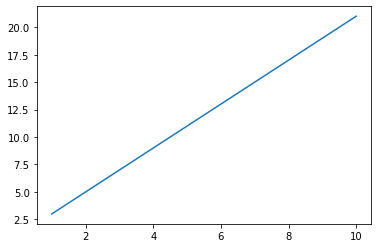

In [20]:
#plt함수를 통해 예측되는 결과를 그래프로 출력해보자.
plt.plot(x,y)
plt.show()

[[25.036926]
 [29.05044 ]]


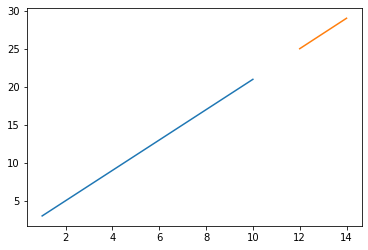

In [23]:
# pred_x : 프레딕션 x / 모델을 프레딕션 하기 위해 실시.
pred_x = []
pred_x = np.append(pred_x, 12)
pred_x = np.append(pred_x, 14)

pred_y = model.predict(pred_x)
print(pred_y)

plt.plot(x,y)
plt.plot(pred_x,pred_y)
plt.show()

#11:04까지의 강의 내용